# Data Science Salaries

Zhuodong KANG

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("ds_salaries.csv")

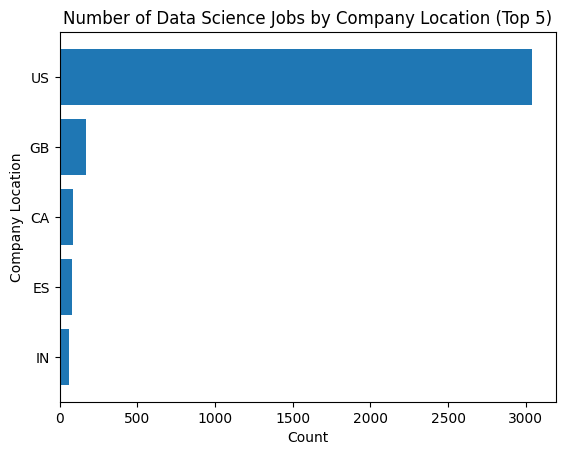

In [2]:
count_by_location = data['company_location'].value_counts().sort_values().tail(5)

plt.barh(count_by_location.index, count_by_location)
plt.xlabel('Count')
plt.ylabel('Company Location')
plt.title('Number of Data Science Jobs by Company Location (Top 5)')
plt.show()

We can see from the graph that the data for other countries is basically meaningless due to the fact that they are too few, only the data for the US is meaningful，so the next section will only look at data from the US

In [3]:
df = data[data['company_location'] == 'US']

#### What is the most common employment type among data scientists in this dataset?

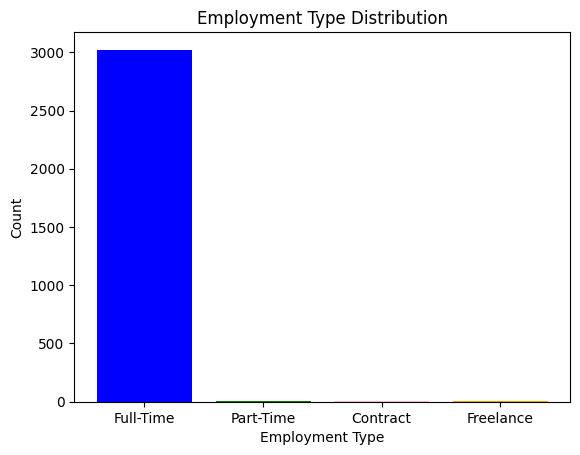

In [4]:
# Count the number of data scientists by employment type
group = df['employment_type'].value_counts()

# Define the employment types and their corresponding colors
emp_type = ['Full-Time', 'Part-Time', 'Contract', 'Freelance']
colors = ['blue', 'green', 'pink', 'orange']

# Create a bar chart of employment type distribution
plt.bar(emp_type, group, color=colors)
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.title('Employment Type Distribution')

plt.show()

We can see from the bar chart that the majority of data scientists in this dataset are employed in full-time positions.Contract positions,part-time and freelance positions are less common.As the sample in other categories was too small, I decided to examine only the full-time sample. We could further explore the distribution of employment types within different salary ranges or experience levels to identify any patterns or trends that may be relevant to our analysis.

In [5]:
df = df[df['employment_type'] == 'FT']

#### What is the most common salary range among data scientists in this dataset?

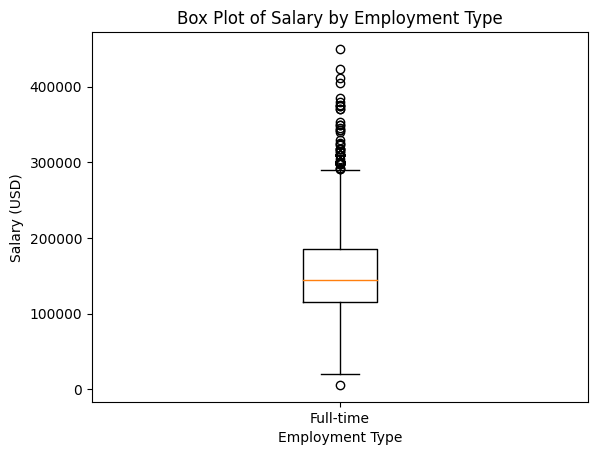

In [6]:
# Create a box plot of salary by employment type
plt.boxplot(df[df['employment_type'] == 'FT']['salary_in_usd'])
plt.title('Box Plot of Salary by Employment Type')
plt.xticks([1], ['Full-time'])
plt.xlabel('Employment Type')
plt.ylabel('Salary (USD)')
plt.show()

/Users/kzd/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


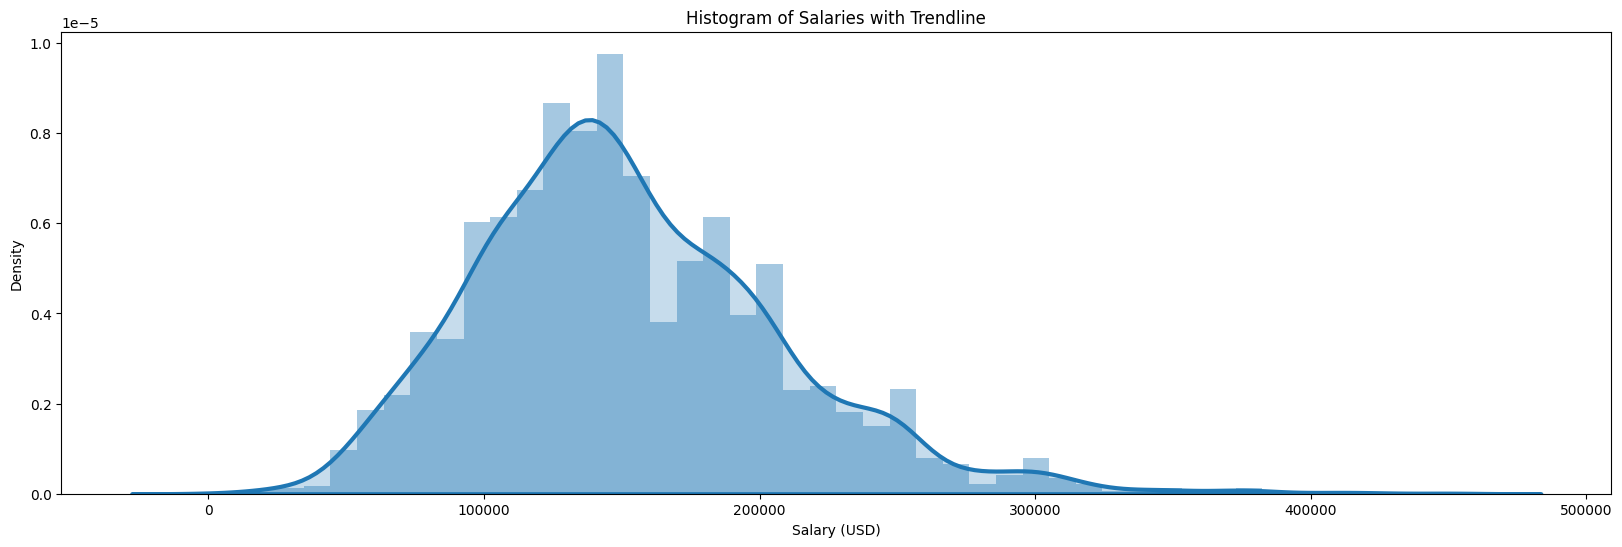

In [7]:
import seaborn as sns
plt.figure(figsize=(20, 6))
sns.distplot(df['salary_in_usd'], hist=True, kde=True, kde_kws={'shade': True, 'linewidth': 3})
plt.title('Histogram of Salaries with Trendline')
plt.xlabel('Salary (USD)')
plt.ylabel('Density')
plt.show()

We can see from the histogram that the majority of data scientists have a salary in the range of around 100,000 to 200,000 USD, with the highest frequency of salaries being in the range of around 110,000 to 150,000 USD. We could further explore the distribution of salaries within this range to identify any patterns or trends that may be relevant to our analysis.

#### What are the most common job titles among data scientists in this dataset?

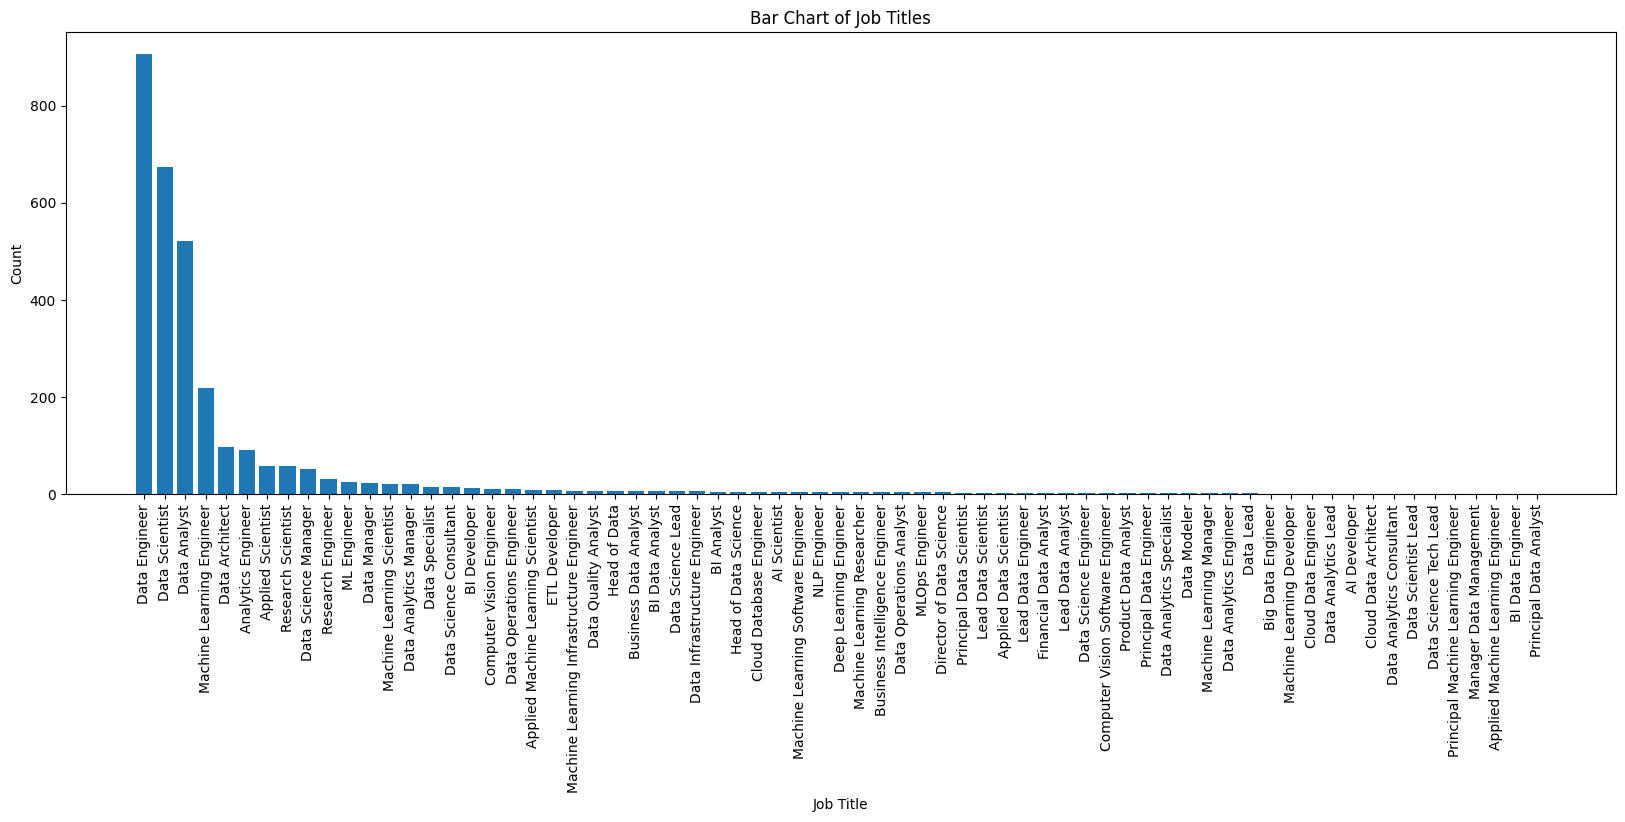

In [8]:
# Create a bar chart of job titles
job_title_counts = df['job_title'].value_counts()
plt.figure(figsize=(20, 6))
plt.bar(job_title_counts.index, job_title_counts.values)
plt.title('Bar Chart of Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

We can see from the bar chart that the most common job title among data scientists is "Data Engineer", followed by "Data Scientist" and "Data Analyst". We could further explore the distribution of job titles within different salary ranges, experience levels, or education levels to identify any patterns or trends that may be relevant to our analysis.

In [9]:
top_job_titles = df['job_title'].value_counts().nlargest(5).index.tolist()

df = df[df['job_title'].isin(top_job_titles)]

#### What is the distribution of experience levels among data scientists in this dataset?

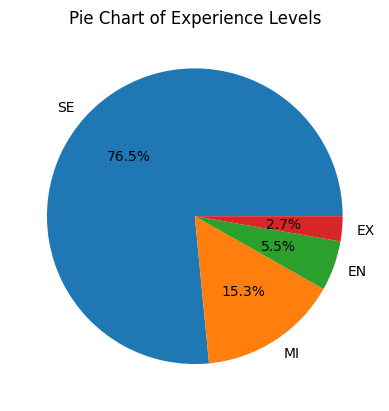

In [10]:
# Create a pie chart of experience levels
exp_level_counts = df['experience_level'].value_counts()
plt.pie(exp_level_counts.values, labels=exp_level_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart of Experience Levels')
plt.show()


We can see from the pie chart that the majority of data scientists in this dataset have a Senior (SE) or Mid-Level (MI) experience level, with Senior being the most common. Entry-Level (EN) and Executive (EX) experience levels are less common among data scientists in this dataset. We could further explore the distribution of experience levels within different salary ranges, job titles, or education levels to identify any patterns or trends that may be relevant to our analysis.

#### Is there a significant difference in salaries between data scientists with different levels of work experience?

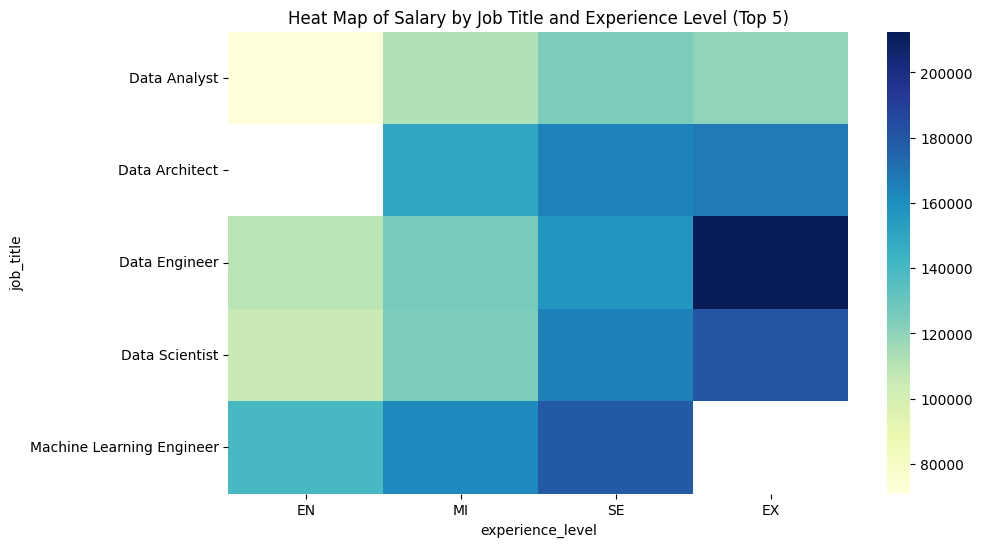

In [11]:
import seaborn as sns

pivot_table = pd.pivot_table(df, values='salary_in_usd', index='job_title', columns='experience_level').reindex(columns=['EN', 'MI', 'SE', 'EX'])

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Heat Map of Salary by Job Title and Experience Level (Top 5)')
plt.show()


We can see from the heatmap that there is a general trend of increasing salary with increasing experience level within each job title. However, the magnitude of the salary increase varies between job titles. For example, the increase in salary between Senior and Mid-Level experience levels is larger for Data Scientist and Machine Learning Engineer job titles compared to Data Analyst and Business Analyst job titles. We could further explore the relationship between job title, experience level, and other variables such as education level or company location to identify any patterns or trends that may be relevant to our analysis.

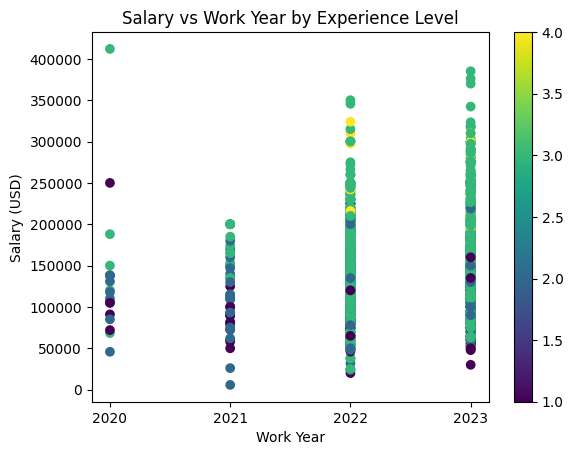

In [12]:
# Create a dictionary to map experience_level to numerical values
exp_level_map = {'EN': 1, 'MI': 2, 'SE': 3,'EX':4}

# Map experience_level to numerical values
df['exp_level_num'] = df['experience_level'].map(exp_level_map)

# Round the work_year values to the nearest integer
df['work_year_rounded'] = df['work_year'].round().astype(int)

# Create a scatter plot of salary versus years of experience, with different markers for different levels of education
plt.scatter(df['work_year_rounded'], df['salary_in_usd'], c=df['exp_level_num'], cmap='viridis')
plt.colorbar()
plt.xlabel('Work Year')
plt.ylabel('Salary (USD)')
plt.title('Salary vs Work Year by Experience Level')

# Set the ticks and labels of the x-axis
plt.xticks(range(df['work_year_rounded'].min(), df['work_year_rounded'].max() + 1))

plt.show()

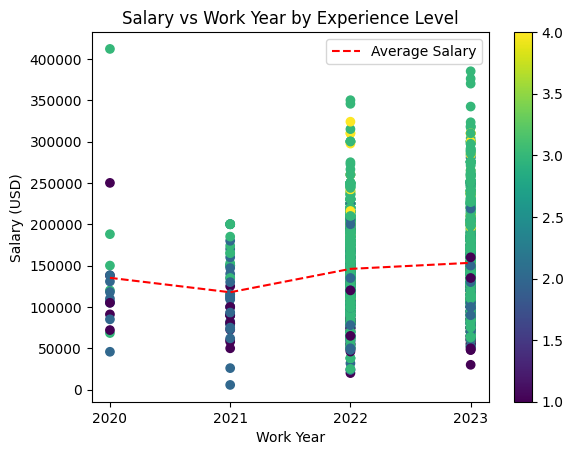

In [13]:
# Create a dictionary to map experience_level to numerical values
exp_level_map = {'EN': 1, 'MI': 2, 'SE': 3,'EX':4}

# Map experience_level to numerical values
df['exp_level_num'] = df['experience_level'].map(exp_level_map)

# Round the work_year values to the nearest integer
df['work_year_rounded'] = df['work_year'].round().astype(int)

# 计算每个工作年份的平均工资
average_salary_by_year = df.groupby('work_year_rounded')['salary_in_usd'].mean()

# 创建散点图
plt.scatter(df['work_year_rounded'], df['salary_in_usd'], c=df['exp_level_num'], cmap='viridis')
plt.colorbar()
plt.xlabel('Work Year')
plt.ylabel('Salary (USD)')
plt.title('Salary vs Work Year by Experience Level')

# 绘制平均工资趋势线
plt.plot(average_salary_by_year.index, average_salary_by_year.values, color='red', linestyle='--', label='Average Salary')

# 设置x轴刻度和标签
plt.xticks(range(df['work_year_rounded'].min(), df['work_year_rounded'].max() + 1))

# 显示图例
plt.legend()

plt.show()



We can see from the scatter plot that there is a general trend of increasing salary with increasing work experience. However, there is significant variation in salary within each level of work experience. We could further explore the relationship between work experience, education level, and salary by examining the distribution of data scientists within each level of education and work experience, and identifying any patterns or trends that may be relevant to our analysis.

/Users/kzd/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Remote Ratio')

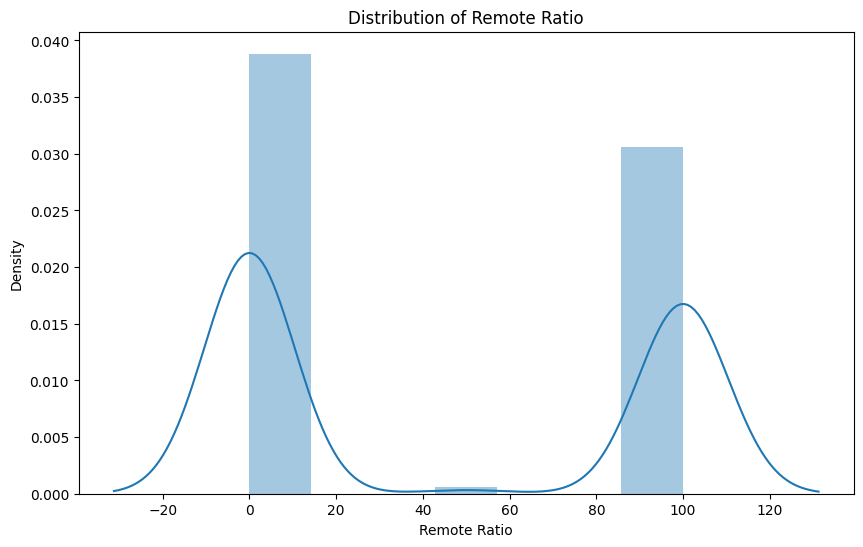

In [14]:
# Set background color and size
plt.figure(figsize = (10,6))


# Create distribution plot
sns.distplot(df['remote_ratio'], kde = True)

# Add a title and axis labels
plt.xlabel('Remote Ratio')
plt.ylabel('Density')
plt.title('Distribution of Remote Ratio')

Due to the previous epidemic, the number of telecommuters was higher than the number of people offline

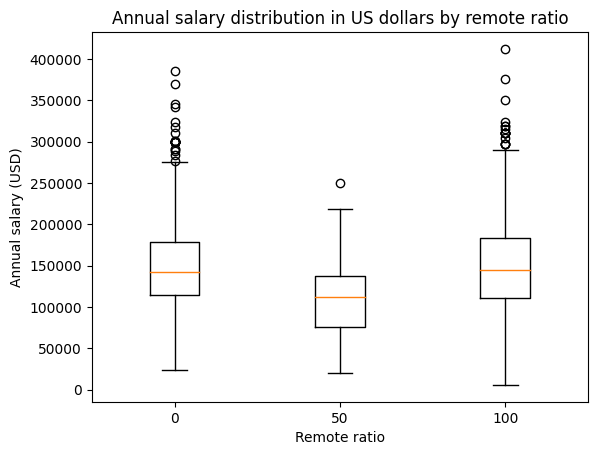

0      1340
100    1056
50       20
Name: remote_ratio, dtype: int64


In [15]:
fig, ax = plt.subplots()

data = []
labels = []

for label, group in df.groupby('remote_ratio'):
    data.append(group['salary_in_usd'])
    labels.append(label)

ax.boxplot(data, labels=labels)
ax.set_title("Annual salary distribution in US dollars by remote ratio")
ax.set_xlabel("Remote ratio")
ax.set_ylabel("Annual salary (USD)")

plt.show()

print(df['remote_ratio'].value_counts())

These two graphs were chosen to see if working remotely would have an impact on wages, but in fact, we can see from the graphs that there is little difference between those who work online and those who work offline